In [99]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [2]:
digits = load_digits()
data = digits.data
label=digits.target

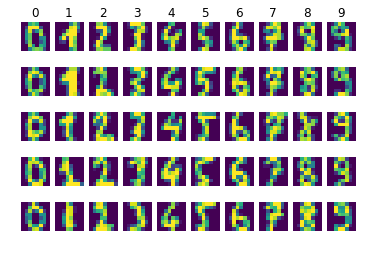

In [7]:
#Randomly select 50 data points to display
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = len(classes)
samples_per_class = 5
for y, cla in enumerate(classes):
    idxs = np.flatnonzero(label == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(digits.images[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cla)
plt.show()

In [92]:
#x:[m,n] X:[m,n+1] y:[m,] theta:[n+1,1] k:number of the class l:regulation paramiter
def sigmoid(z):
    return 1/(1+np.exp(-z))
def h(theta,X):
    return sigmoid(X@theta)
def cost(theta,X,y,L):
    return -y@np.log(h(theta,X))/(2*X.shape[0])-(1-y)@np.log(1-h(theta,X))/(2*X.shape[0])+L*theta.T@theta/(2*X.shape[0])
def add_one(x):
    m,n=x.shape
    one=np.ones([m,1])
    return np.c_[one,x]
def grad(theta,X,y,L):
    return (X.T@(h(theta,X)-y)+L*np.r_[0,theta[1:]])/X.shape[0]
def train(X,y,k,L):
    m,n=X.shape
    theta_arr=np.zeros([n,k])
    for i in range(k):
        theta=np.zeros(n)
        y_i=np.array([1 if label==i else 0 for label in y])
        res = optimize.fmin_cg(cost,x0=theta,fprime=grad,args=(X,y_i,L),maxiter=500)
        theta_arr[:,i]=res
    return theta_arr
def predict(theta,X):
    y_pre=np.argmax(h(theta,X),axis=1)
    return y_pre

In [100]:
#main function
X=add_one(data)
y=label
k=10
L=0.1
theta=train(X,y,k,L)

         Current function value: 0.000149
         Iterations: 35
         Function evaluations: 127
         Gradient evaluations: 115
         Current function value: 0.015410
         Iterations: 256
         Function evaluations: 675
         Gradient evaluations: 662
         Current function value: 0.000242
         Iterations: 47
         Function evaluations: 234
         Gradient evaluations: 222
         Current function value: nan
         Iterations: 500
         Function evaluations: 5293
         Gradient evaluations: 5293
         Current function value: 0.000311
         Iterations: 44
         Function evaluations: 172
         Gradient evaluations: 160
Optimization terminated successfully.
         Current function value: nan
         Iterations: 453
         Function evaluations: 6605
         Gradient evaluations: 6602
         Current function value: 0.000521
         Iterations: 73
         Function evaluations: 306
         Gradient evaluations: 294
Optimization 

In [102]:
y_pre=predict(theta,X)
print("Accuracy:"+str(np.mean(y_pre==y)))

Accuracy:0.9944351697273233
